In [337]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import random as rnd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [ ]:
# import sys
# if 'Photu.Photu' in sys.modules:
#     del sys.modules["Photu"]
# from Photu.Photu import *

In [339]:
def titanic(train, test):
    train_df = pd.read_csv(train)
    test_df = pd.read_csv(test)
    combine = [train_df, test_df]

    train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
    test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

    pd.crosstab(train_df['Title'], train_df['Sex'])

    for dataset in combine:
        dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

        dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
        dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    for dataset in combine:
        dataset['Title'] = dataset['Title'].map(title_mapping)
        dataset['Title'] = dataset['Title'].fillna(0)

    train_df = train_df.drop(['Name', 'PassengerId'], axis=1)
    test_df = test_df.drop(['Name'], axis=1)
    combine = [train_df, test_df]

    for dataset in combine:
        dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

    guess_ages = np.zeros((2,3))
    guess_ages

    for dataset in combine:
        for i in range(0, 2):
            for j in range(0, 3):
                guess_df = dataset[(dataset['Sex'] == i) & \
                                      (dataset['Pclass'] == j+1)]['Age'].dropna()

                # age_mean = guess_df.mean()
                # age_std = guess_df.std()
                # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)

                age_guess = guess_df.median()

                # Convert random age float to nearest .5 age
                guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

        for i in range(0, 2):
            for j in range(0, 3):
                dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                        'Age'] = guess_ages[i,j]

        dataset['Age'] = dataset['Age'].astype(int)

    for dataset in combine:
        dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1



    for dataset in combine:
        dataset['IsAlone'] = 0
        dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

    combine = [train_df, test_df]

    freq_port = train_df.Embarked.dropna().mode()[0]

    for dataset in combine:
        dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)

    test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)

    test_df.head(10)
    return [train_df,test_df]

In [340]:
train = pd.read_csv('train.csv', encoding= 'UTF-8')
test = pd.read_csv('test.csv', encoding='UTF-8')

In [341]:
train,test = titanic('train.csv','test.csv')


In [342]:
train = pd.get_dummies(train)
test = pd.get_dummies(test)


In [ ]:
regr_1 = DecisionTreeClassifier(max_depth=3)

In [375]:
X=train.iloc[:,1:]
y=train['Survived']

In [376]:
X_test = test.iloc[:,1:]

In [345]:
regr_1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [12]:

# plt.figure()
# plt.scatter(X, y, c="k", label="data")
# plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)

In [346]:
y_pred = regr_1.predict(X_test)

In [40]:
X.shape
y.shape

In [414]:
PassengerId = test['PassengerId']
decisiontree_pred=pd.DataFrame(y_pred, index=PassengerId,columns=['Survived'])

decisiontree_pred=final_pred.reset_index()
decisiontree_pred.head()

,index,PassengerId,Survived
0,0,892,0
1,1,893,1
2,2,894,0
3,3,895,0
4,4,896,1


In [349]:
decisiontree_pred.to_csv('prediction.csv',index=False)

In [42]:
from sklearn import tree
from IPython.display import Image 
from StringIO import StringIO
import pydotplus

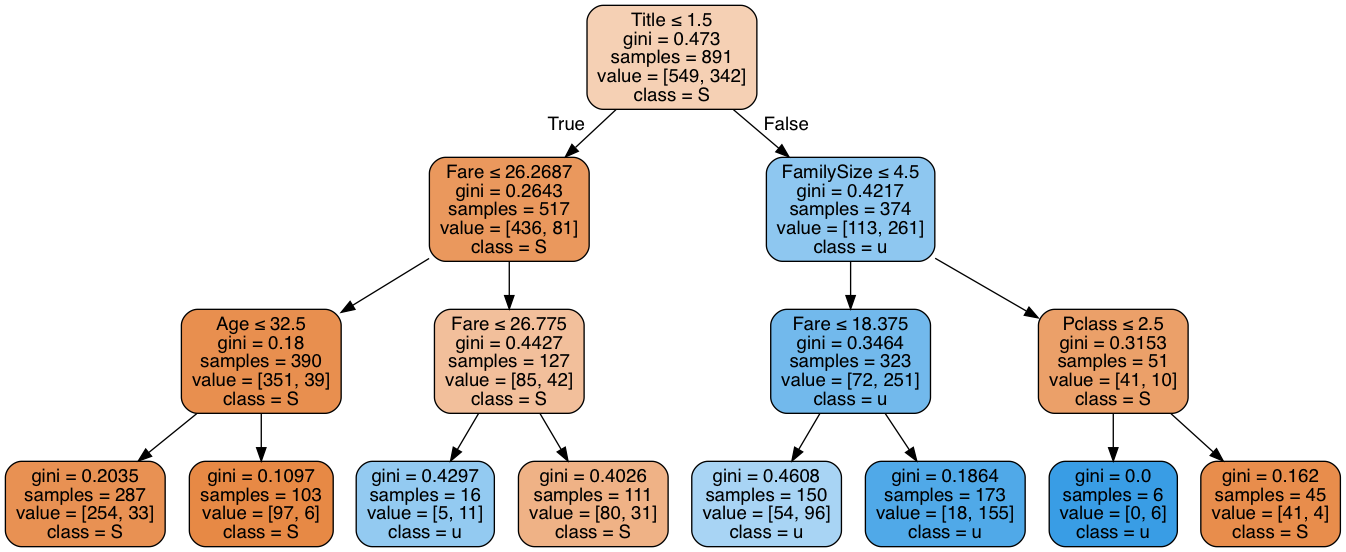

In [43]:
dot_data = StringIO()  
tree.export_graphviz(regr_1, out_file=dot_data,  
                         feature_names= X.columns,  
                         class_names='Survived',  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [49]:
def draw_tree(classifier,feature_list,class_list):
    dot_data = StringIO()  
    tree.export_graphviz(classifier, out_file=dot_data,  
                         feature_names= feature_list,  
                         class_names=class_list,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())


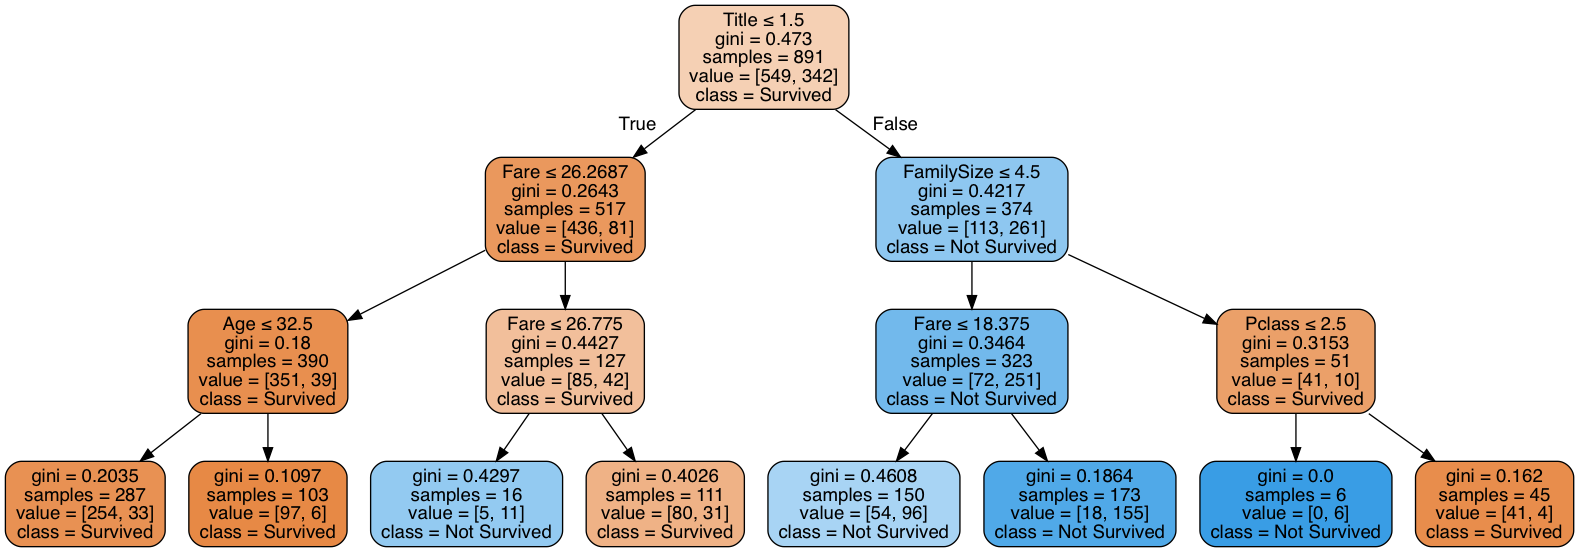

In [59]:
draw_tree(regr_1,X.columns,['Survived','Not Survived'])


In [315]:
#Random Forest

In [350]:
X_train,X_test,y_train,y_test = train_test_split(X, y,
                             test_size=0.2, random_state=23)

In [351]:
len(X_test)

179

In [352]:
len(X_train)

712

In [353]:
#oobscore is used for out of bag checking. use a test fold along with all the kfolds and provide accuracy metrics
clf = RandomForestClassifier(oob_score=True)


In [213]:
#dictionary of hyper paramteres to be tested using gridsearch
# n-estimators = number of trees in randomforest classifier
# parameters = {'n_estimators': [2,4,8,16,32,64,128]}

In [354]:
# acc_scorer = make_scorer(accuracy_score)

In [356]:
# Run the grid search
# grid_obj = GridSearchCV(clf, parameters, scoring=acc_scorer)
# grid_obj = grid_obj.fit(X_train, y_train)
# grid_obj.param_grid.values()[0]
# param_values =[str(x) for x in grid_obj.param_grid.values()[0]]
# Set the clf to the best combination of parameters
# param_values
# dir(clf)

In [358]:
clf = grid_obj.best_estimator_


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=128, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [188]:
# clf.decision_path
# grid_obj.cv_results_['mean_test_score']

In [359]:
test_scores = grid_obj.cv_results_['mean_test_score']
train_scores = grid_obj.cv_results_['mean_train_score']

In [217]:
# plt.plot(train_scores,test_scores)
# plt.xlabel("train mean scores")
# plt.ylabel('test mean scores')
# plt.show()

In [397]:
#create a gridsearch object
def grid_obj_creator(classifier, parameters, X, y):
    acc_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(classifier, parameters, scoring=acc_scorer)
    grid_obj = grid_obj.fit(X, y)
    return grid_obj

In [398]:
#plot mean scores for a particular grid object
def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']
    mean_train_scores = grid_obj.cv_results_['mean_train_score']
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in grid_obj.param_grid.values()[0]]
    x = np.arange(1, len(param_values)+1)
    plt.plot(x,mean_train_scores,c='r')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g')
    plt.xlabel(grid_obj.param_grid.keys()[0])
    plt.ylabel('mean scores')
    plt.show()

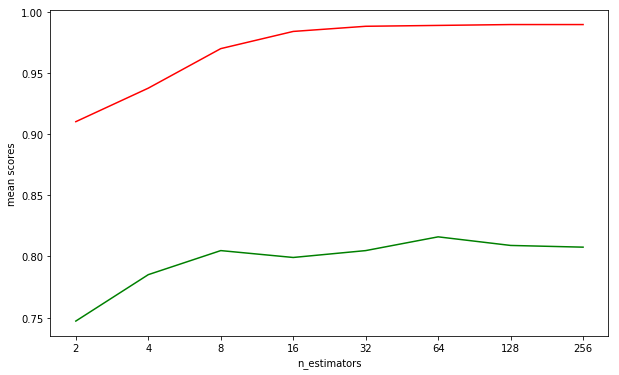

In [399]:
random1 =RandomForestClassifier(oob_score=True)
grid1 = grid_obj_creator(random1,{'n_estimators':[2,4,8,16,32,64,128,256]},X_train,y_train)
hp_cv_scores(grid1)

In [320]:
grid1.best_params_

{'n_estimators': 128}

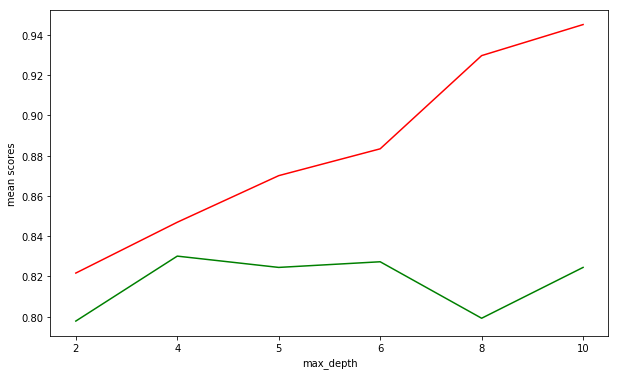

In [400]:
grid2 = grid_obj_creator(random1,{'max_depth':[2,4,5,6,8,10]},X_train,y_train)
hp_cv_scores(grid2)

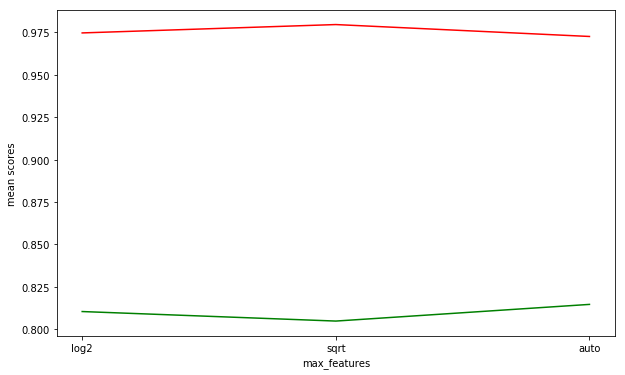

In [401]:
grid3 = grid_obj_creator(random1,{'max_features':['log2','sqrt','auto']},X_train,y_train)
hp_cv_scores(grid3)

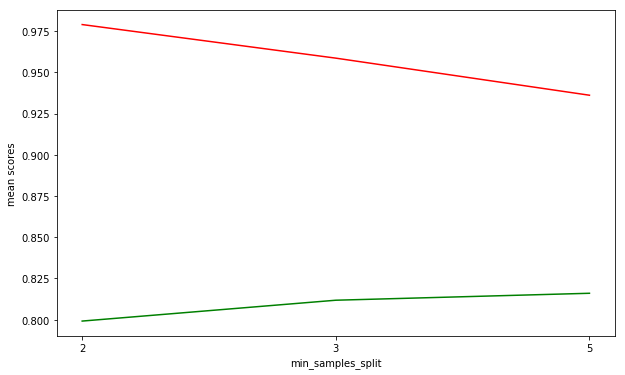

In [402]:
grid4 = grid_obj_creator(random1,{'min_samples_split':[2,3,5]},X_train,y_train)
hp_cv_scores(grid4)

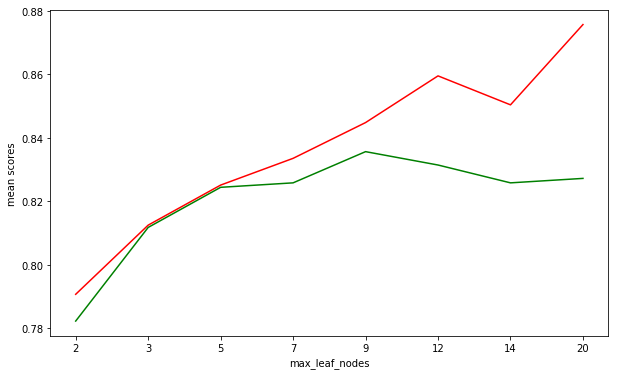

In [403]:
grid4 = grid_obj_creator(random1,{'max_leaf_nodes':[2,3,5,7,9,12,14,20]},X_train,y_train)
hp_cv_scores(grid4)

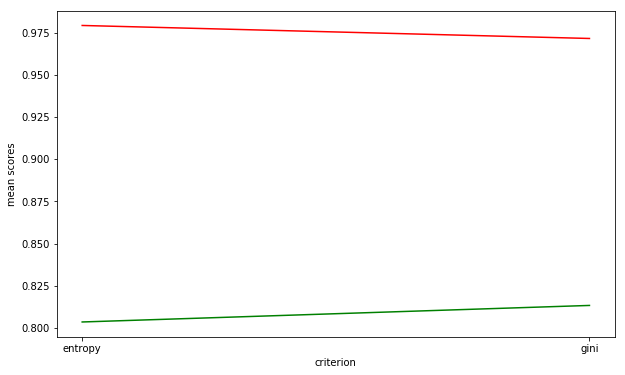

In [404]:
grid5 = grid_obj_creator(random1,{'criterion': ['entropy', 'gini']},X_train,y_train)
hp_cv_scores(grid5)

In [405]:
parameters = {'n_estimators':[2,4,8,16,32,64,128,256], 
              'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2, 3, 5, 10], 
              'min_samples_split': [2, 3, 5,6,8],
              'min_samples_leaf': [1,5,8,10]
             }

In [406]:
random2 = RandomForestClassifier(oob_score=True)
random2 = grid_obj_creator(random2,parameters,X,y)

KeyboardInterrupt: 

In [407]:
random1 = RandomForestClassifier(n_estimators=64,
                                 max_features='auto',
                                 criterion='gini',
                                 max_depth=4,
                                 min_samples_split=5,
                                 max_leaf_nodes=9
                                 )

In [408]:
random1.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=9,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=5, min_weight_fraction_leaf=0.0,
            n_estimators=64, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [409]:
prediction = random1.predict(X_test)

In [392]:
accuracy_score(y_test,prediction)

ValueError: Found input variables with inconsistent numbers of samples: [179, 418]

In [381]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(estimator= random1,     # Model to test
                X = X,  
                y = y,
                scoring = "accuracy",               # Scoring metric    
                cv=10)

In [382]:
print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[ 0.77777778  0.83333333  0.76404494  0.78651685  0.83146067  0.82022472
  0.82022472  0.7752809   0.83146067  0.85227273]
('Average accuracy: ', 0.80925973215299063)


In [410]:
len(X_test)

418

In [411]:
len(y)

891

In [412]:

random_pred=pd.DataFrame(prediction, index=test['PassengerId'],columns=['Survived'])

random_pred=random_pred.reset_index()
random_pred.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [394]:
len(random_pred)

418

In [413]:
random_pred.to_csv('RFTitanicprediction.csv',index=False)

In [ ]:
def best_estimator(classifier,parameters,X,y):
    